## **Dataset Generator**
From txt file to annotated augmented cipher generated images

In [21]:
from collections import defaultdict
import os
import json
import random

In [ ]:
from collections import defaultdict
import random
import re

def transcription():
    """
    Creates dictionary to translate between regular text and the Copiale transcription
    
    Returns:
        Dictionary mapping regular text to transcription elements
    """
    # Create frequency weights for multiple transcriptions
    # These weights are derived from the frequency analysis
    frequency_weights = {
        'CapitalLambda': 2393, 'o': 2246, 'c': 2128, 'z': 2093,'VerticalLine': 2086, 'u__': 2076, '3': 1825, 'm': 1705, 'p': 1635,'n': 1590,'h': 1556,
        'Saturn': 1451, 'SleepingSymbol': 1443, 'SmallIota': 1409, 'SmallNHook': 1352, 'e': 1307, 'i': 1304, 'LatinSmallLigatureFi': 1302, 'u': 1275,
        'r': 1252, 'y': 1194, 'SmallPi': 1165, 'a': 1137, 'r__': 1131, 'j': 1128, 'g': 1083, 'SquareP': 1007, 'NorthEastArrow': 959, 'b': 957, 'x': 939,
        'v': 849, 'Fire': 848, 'CapitalGamma': 746, 'NotEqualTo': 738, 'ScriptSmallG': 731, 'SmallDelta': 718, 'InsularD': 704, 's': 689, 'k': 642,'m__': 612,
        'l': 598, 'PhoenicianLetterPe': 590, 'n__': 556, 'TopHalfIntegral': 487, 'f': 432, 'RockSalt': 414, 'Dagger': 392, 'Earth': 387, 'ScriptSmallZ': 362,
        'd': 291, 'LatinLongLigatureFi': 281, 'Infinity': 266, 'w': 218, 'SquaredPlus': 201, 'Female': 199, 'Alkali': 190, 't': 168, 'SquaredRisingDiagonalSlash': 120,
        'TriangleDot': 95, 'UpwardsArrow': 65, 'BigN': 46, 'q': 42, 'Integral': 40,
        # Adding the rest with lower frequencies
        'CircledEquals': 28, 'BigP': 25, 'BallotScriptX': 20,'Dissolve': 20, 'BigR': 18, 'BigV': 16, 'Dissolve_Square': 14, 'Eye': 14, 'BigB': 14, 
        'Pentagram': 13, 'BigH': 13, 'BigK': 12, 'qua': 12, 'BigD': 11, 'BigS': 10, 'BigL': 9, 'BigM': 9, 'BigF': 8, 'BigC': 7, 'BigG': 6, 'Cloud': 5,
        'BigT': 3, 'BigQ': 2, 'BigFire': 2, 'BigZ': 2, 'BigW': 2, 'BigInsularD': 1, 'sci': 1, 'krussedull': 1, 'gate': 1, 'BigJ': 1, 'PlainBigL': 1
    }


    # For symbols not in our frequency list, assign a default low weight
    DEFAULT_WEIGHT = 1
    # Map of transcription with lists for multiple values
    transcribe = defaultdict(list)

    # Add mappings consistently
    transcribe['a'].extend(['p^.', 'n^.', 'h^.', 'Female'])
    transcribe['ä'].append('Female')
    transcribe['b'].append('SquareP')
    transcribe['c'].append('PhoenicianLetterPe')
    transcribe['d'].extend(['SmallPi', 'z'])
    transcribe['e'].extend(['a^^', 'e^^', 'i^^', 'o^^', 'u^^', 'LatinSmallLigatureFi', 'SleepingSymbol'])
    transcribe['f'].append('CapitalGamma')
    transcribe['g'].extend(['SmallDelta', 'x^.'])
    transcribe['h'].extend(['Saturn', 'RockSalt'])
    transcribe['i'].extend(['y^..', 'SmallNHook', 'SmallIota'])
    transcribe['j'].append('UpwardsArrow')
    transcribe['k'].append('RockSalt')
    transcribe['l'].append('c^.')
    transcribe['m'].append('+')
    transcribe['n'].extend(['m__', 'r__', 'n__', 'g'])
    transcribe['o'].extend(['Fire', 'o^.'])
    transcribe['ö'].append('SquaredRisingDiagonalSlash')
    transcribe['p'].append('d')
    transcribe['q'].append('qua')
    transcribe['r'].extend(['r^.', '3', 'j'])
    transcribe['s'].extend(['VerticalLine', 'SquaredPlus'])
    transcribe['t'].append('CapitalLambda')
    transcribe['u'].extend(['=', 'NotEqualTo'])
    transcribe['ü'].append('LatinLongLigatureFi')
    transcribe['v'].append('Earth')
    transcribe['w'].append('m^.')
    transcribe['x'].append('f')
    transcribe['y'].append('Infinity')
    transcribe['z'].append('s^.')

    # Syllables
    transcribe['sch'].append('Dagger')
    transcribe['ss'].append('SquaredPlus')
    transcribe['st'].append('TopHalfIntegral')
    transcribe['ch'].append('NorthEastArrow')
    transcribe['en'].append('u__')
    transcribe['em'].append('u__')

    # Repeat previous consonant ':' Applied later

    # Spaces
    transcribe[' '].extend([
        'Integral', 'a', 'b', 'c', 'd', 'e', 'f', 'TF', 'ScriptSmallG', 'h', 'i',
        'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'Integral', 't', 'u',
        'v', 'w', 'x', 'y', 'ScriptSmallZ', 'BigA', 'BigB', 'BigC', 'BigD', 
        'BigE', 'BigF', 'BigG', 'BigH', 'BigI', 'BigJ', 'BigK', 'BigL', 'BigM', 
        'BigN', 'BigO', 'BigP', 'BigQ', 'BigR', 'BigS', 'BigT', 'BigU', 'BigV', 
        'BigW', 'BigX', 'BigY', 'BigZ'
    ])

    return transcribe

# Function to select a transcription symbol based on smoothed frequency weights
def weighted_choice(symbols, frequency_weights):
    """
    Select a transcription symbol based on frequency weights with smoothing
    
    Args:
        symbols (list): List of possible symbols to choose from
        frequency_weights (dict): Dictionary of symbol frequencies
        
    Returns:
        str: Selected symbol
    """
    if not symbols:
        return ""
    
    # Smoothing parameters
    SMOOTHING_FACTOR = 0.5  # Lower values make weights more equal
    MIN_WEIGHT = 5  # Minimum weight for any symbol
    DEFAULT_WEIGHT = 1
    
    weights = []
    for symbol in symbols:
        raw_weight = frequency_weights.get(symbol, DEFAULT_WEIGHT)
        smoothed_weight = raw_weight ** SMOOTHING_FACTOR
        final_weight = max(smoothed_weight, MIN_WEIGHT)
        weights.append(final_weight)
    
    total_weight = sum(weights)
    
    # If all weights are zero, use equal weights
    if total_weight == 0:
        return random.choice(symbols)
    
    # Select based on weights
    r = random.uniform(0, total_weight)
    cumulative_weight = 0
    
    for i, weight in enumerate(weights):
        cumulative_weight += weight
        if r <= cumulative_weight:
            return symbols[i]
    
    # Fallback to random choice
    return random.choice(symbols)

def apply_transcription(text, trans_dict, frequency_weights):
    """
    Apply transcription to plain text using frequency-weighted symbols
    
    Args:
        text (str): Plain text to convert
        trans_dict (dict): Transcription dictionary
        frequency_weights (dict): Dictionary of symbol frequencies
        
    Returns:
        str: Transcribed text
    """
    text = text.lower()
    result = []
    i = 0
    vowels = 'aeiouäöüy'  # Including y and German umlauts as vowels
    
    syllables = ['sch', 'ss', 'st', 'ch', 'en', 'em']

    # First pass: identify direct consonant repetitions in the original text
    repeated_consonant_positions = set()
    j = 0
    while j < len(text) - 1:  # Stop one character before the end
        if (text[j].isalpha() and text[j] not in vowels and
            text[j] == text[j+1]):  # Current char equals next char
            repeated_consonant_positions.add(j+1)  # Mark the second position
        j += 1
    
    # Second pass: do the actual transcription
    while i < len(text):
        # Check for syllables first
        matched = False
        for syl in syllables:
            if text[i:i+len(syl)] == syl and i+len(syl) <= len(text):
                # Use weighted choice for syllables
                if syl in trans_dict and trans_dict[syl]:
                    result.append(weighted_choice(trans_dict[syl], frequency_weights))
                    matched = True
                    i += len(syl)
                    break
        
        if matched:
            continue

        # Handle individual characters
        char = text[i]
        
        # If this position was marked as a repeated consonant, use ':'
        if i in repeated_consonant_positions:
            result.append(':')
        elif char in trans_dict and trans_dict[char]:
            # Use weighted choice for characters
            result.append(weighted_choice(trans_dict[char], frequency_weights))
        else:
            result.append(char)

        i += 1

    return ' '.join(result)


def createTranslator():
    """
    Creates dictionary to translate between the transcription and the font (CopialeV2.ttf)
    
    Returns:
        Dictionary mapping transcription elements to font characters
    """
    # Dictionary with default values
    translator = defaultdict(lambda: '')
    
    # Letters
    translator['a'] = 'a'
    translator['a^^'] = 'A'
    translator['BigA'] = 'a'  # No direct translation
    translator['b'] = 'b'
    translator['BigB'] = 'b'  # No direct translation
    translator['c'] = 'c'
    translator['c^.'] = 'C'
    translator['BigC'] = 'c'  # No direct translation
    translator['d'] = 'd'
    translator['BigD'] = 'd'  # No direct translation
    translator['e'] = 'e'
    translator['e^^'] = 'E'
    translator['BigE'] = 'e'  # No direct translation
    translator['f'] = 'f'
    translator['BigF'] = '_'  # More or less
    translator['g'] = 'g'
    translator['BigG'] = 'g'  # No direct translation
    translator['h'] = 'h'
    translator['h^.'] = 'H'
    translator['BigH'] = 'h'  # No direct translation
    translator['i'] = 'i'
    translator['i^^'] = 'I'
    translator['BigI'] = 'i'  # No direct translation
    translator['j'] = 'j'
    translator['BigJ'] = 'j'  # No direct translation
    translator['k'] = 'k'
    translator['BigK'] = 'k'  # No direct translation
    translator['l'] = 'l'
    translator['BigL'] = 'l'  # No direct translation
    translator['m'] = 'm'
    translator['m^.'] = 'M'
    translator['m__'] = 'B'
    translator['BigM'] = 'm'  # No direct translation
    translator['n'] = 'n'
    translator['n^.'] = 'N'
    translator['n__'] = 'D'
    translator['BigN'] = 'n'  # No direct translation
    translator['o'] = 'o'
    translator['o^.'] = '&'
    translator['o^^'] = 'O'
    translator['BigO'] = 'o'  # No direct translation
    translator['p'] = 'p'
    translator['p^.'] = 'P'
    translator['BigP'] = 'p'  # No direct translation
    translator['q'] = 'q'
    translator['BigQ'] = 'q'  # No direct translation
    translator['r'] = 'r'
    translator['r^.'] = 'R'
    translator['r__'] = 'F'
    translator['BigR'] = 'r'  # No direct translation
    translator['s'] = 's'
    translator['s^.'] = 'S'
    translator['BigS'] = 's'  # No direct translation
    translator['t'] = 't'
    translator['BigT'] = 't'  # No direct translation
    translator['u'] = 'u'
    translator['u^^'] = 'U'
    translator['u__'] = 'G'
    translator['BigU'] = 'u'  # No direct translation
    translator['v'] = 'v'
    translator['BigV'] = 'v'  # No direct translation
    translator['w'] = 'w'
    translator['BigW'] = 'w'  # No direct translation
    translator['x'] = 'x'
    translator['x^.'] = 'X'
    translator['BigX'] = 'x'  # No direct translation
    translator['y'] = 'y'  
    translator['y^..'] = 'y'
    translator['BigY'] = 'y'  # No direct translation
    translator['z'] = 'z'
    translator['BigZ'] = 'z'  # No direct translation
    
    # Symbols
    translator['+'] = '+'
    translator['.'] = '.'
    translator['..'] = '..'
    translator['...'] = ','
    translator[':'] = ':'
    translator['='] = '='
    translator['3'] = '3'
    
    # Logograms
    translator['Alkali'] = '9'
    translator['BallotScriptX'] = '%'
    translator['BigFire'] = '<'  # No direct translation
    translator['BigInsularD'] = 'L'  # No direct translation
    translator['CapitalGamma'] = '~'
    translator['CapitalLambda'] = '^'
    translator['CircledEquals'] = '@'
    translator['Dagger'] = 'T'
    translator['Earth'] = '1'
    translator['Eye'] = '2'
    translator['Female'] = '0'
    translator['Fire'] = '<'
    translator['Infinity'] = '8'
    translator['InsularD'] = 'L'
    translator['Integral'] = '`'
    translator['LatinLongLigatureFi'] = ']'
    translator['LatinSmallLigatureFi'] = ')'
    translator['NorthEastArrow'] = '/'
    translator['NotEqualTo'] = '"'
    translator['PhoenicianLetterPe'] = '?'
    translator['RockSalt'] = '5'
    translator['Saturn'] = '-'
    translator['ScriptSmallG'] = 'K'
    translator['ScriptSmallZ'] = 'J'
    translator['SleepingSymbol'] = 'Z'
    translator['SmallDelta'] = '6'
    translator['SmallIota'] = '!'
    translator['SmallNHook'] = 'Y'
    translator['SmallPi'] = '>'
    translator['SquareP'] = 'Q'
    translator['SquaredPlus'] = '['
    translator['SquaredRisingDiagonalSlash'] = 'W'
    translator['TopHalfIntegral'] = '7'
    translator['TriangleDot'] = '#'
    translator['UpwardsArrow'] = '4'
    translator['VerticalLine'] = '|'
    
    # Copiale V2
    translator['(:'] = '('
    translator[':)'] = '$'
    translator['gate'] = '\''
    translator['Cloud'] = ';'
    translator['Pentagram'] = '*'
    
    # Not found in trainset, in font
    translator['TF'] = '\\'
    
    # Corrections
    translator['e?'] = '3'  # Assumed wrong direction
    translator['qua'] = 'W'  # Assumed missing line
    translator['('] = '('  # Assumed missing points
    translator[')'] = '$'  # Assumed missing points
    
    # Space
    translator[' '] = ' '
    
    # Add any missing punctuation
    translator['!'] = '!'
    translator['?'] = '?'
    translator[','] = ','
    
    return translator

def text_to_copiale(input_text):
    """
    Convert regular text to Copiale cipher
    
    Args:
        input_text (str): The text to convert to Copiale
        
    Returns:
        str: The transcribed text in Copiale notation
    """
    # Get the transcription dictionary
    trans_dict = transcription()
    
    # Initialize result
    result = []
    
    # Process each character
    i = 0
    while i < len(input_text):
        # Check for multi-character sequences first
        found = False
        for key_length in range(6, 1, -1):  # Check from 6-char to 2-char sequences
            if i + key_length <= len(input_text):
                potential_key = input_text[i:i+key_length].lower()
                if potential_key in trans_dict:
                    result.append(trans_dict[potential_key])
                    i += key_length
                    found = True
                    break
        
        # If no multi-character sequence found, process single character
        if not found:
            char = input_text[i]
            
            # Handle uppercase letters
            if char.isalpha() and char.isupper():
                # First check if the uppercase letter is directly in the dictionary
                if char in trans_dict:
                    result.append(trans_dict[char])
                else:
                    # Try the "Big" + uppercase version
                    big_key = char.upper()  # Make sure it's uppercase
                    result.append(trans_dict[big_key])
            # Handle lowercase and other characters
            elif char.lower() in trans_dict:
                result.append(trans_dict[char.lower()])
            else:
                # Keep characters that don't have a mapping
                result.append(char)
            
            i += 1
    
    return ' '.join(result)

def copiale_to_font(copiale_text):
    """
    Convert Copiale transcription to CopialeV2 font characters
    
    Args:
        copiale_text (str): The Copiale transcription text
        
    Returns:
        str: Text with characters mapped to CopialeV2 font
    """
    # Get the translator dictionary
    translator = createTranslator()
    
    # Split by spaces and translate each element
    transcription_elements = copiale_text.split()
    font_chars = []
    
    for element in transcription_elements:
        if element in translator:
            font_chars.append(translator[element])
        else:
            # Keep original if no translation exists
            font_chars.append(element)
    
    return ''.join(font_chars)  # Join without spaces for the font


def complete_translation(input_text):
    """
    Complete pipeline that:
    1. Converts input text to Copiale transcription
    2. Converts transcription to CopialeV2 font characters
    
    Args:
        input_text (str): The input text to convert
        
    Returns:
        tuple: (copiale_transcription, font_characters)
    """
    copiale_transcription = text_to_copiale(input_text)
    font_characters = copiale_to_font(copiale_transcription)
    
    return copiale_transcription, font_characters


### Augmentation

In [ ]:
import cv2
import numpy as np
import random

def augmentor(img):
    TH,TW=img.shape

    param_gamma_low=.3
    #param_gamma_low=.5 # Nacho fixed
    param_gamma_high=2

    param_mean_gaussian_noise=0
    param_sigma_gaussian_noise=100**0.5

    param_kanungo_alpha=2 # params controlling how much foreground and background pixels flip state
    param_kanungo_beta=2
    param_kanungo_alpha0=1
    param_kanungo_beta0=1
    param_kanungo_mu=0
    param_kanungo_k=2

    param_min_shear=-.5 # here a little bit more shear to the left than to the right
    param_max_shear=.25

    param_rotation=3 # plus minus angles for rotation

    param_scale=.2 # one plus minus parameter as scaling factor

    param_movement_BB=6 # translation for cropping errors in pixels

    # add gaussian noise
    gauss = np.random.normal(param_mean_gaussian_noise,param_sigma_gaussian_noise,(TH,TW))
    gauss = gauss.reshape(TH,TW)
    gaussiannoise = np.uint8(np.clip(np.float32(img) + gauss,0,255))

    # randomly erode, dilate or nothing
    # we could move it also after binarization
    kernel=np.ones((3,3),np.uint8)
    #a=random.choice([1,2,3])
    a=random.choice([2,3]) # Nacho fixed
    #a = 3 # Nacho fixed
    if a==1:
        gaussiannoise=cv2.dilate(gaussiannoise,kernel,iterations=1)
    elif a==2:
        gaussiannoise=cv2.erode(gaussiannoise,kernel,iterations=1)

    # add random gamma correction
    gamma=np.random.uniform(param_gamma_low,param_gamma_high)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    gammacorrected = cv2.LUT(np.uint8(gaussiannoise), table)

    # binarize image with Otsu
    otsu_th,binarized = cv2.threshold(gammacorrected,0,1,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Kanungo noise
    dist = cv2.distanceTransform(1-binarized, cv2.DIST_L1, 3)  # try cv2.DIST_L1 for newer versions of OpenCV
    dist2 = cv2.distanceTransform(binarized, cv2.DIST_L1, 3) # try cv2.DIST_L1 for newer versions of OpenCV

    dist = dist.astype('float64') # Tro add
    dist2 = dist2.astype('float64') # Tro add

    P=(param_kanungo_alpha0*np.exp(-param_kanungo_alpha * dist**2)) + param_kanungo_mu
    P2=(param_kanungo_beta0*np.exp(-param_kanungo_beta * dist2**2)) + param_kanungo_mu
    distorted=binarized.copy()
    distorted[((P>np.random.rand(P.shape[0],P.shape[1])) & (binarized==0))]=1
    distorted[((P2>np.random.rand(P.shape[0],P.shape[1])) & (binarized==1))]=0
    closing = cv2.morphologyEx(distorted, cv2.MORPH_CLOSE, np.ones((param_kanungo_k,param_kanungo_k),dtype=np.uint8))

    # apply binary image as mask and put it on a larger canvas
    pseudo_binarized = closing * (255-gammacorrected)
    canvas=np.zeros((3*TH,3*TW),dtype=np.uint8)
    canvas[TH:2*TH,TW:2*TW]=pseudo_binarized
    points=[]
    count = 0 # Tro add
    while(len(points)<1):
        count += 1 # Tro add
        if count > 50: # Tro add
            break # Tro add

        # random shear
        shear_angle=np.random.uniform(param_min_shear,param_max_shear)
        M=np.float32([[1,shear_angle,0],[0,1,0]])
        sheared = cv2.warpAffine(canvas,M,(3*TW,3*TH),flags=cv2.WARP_INVERSE_MAP|cv2.INTER_CUBIC)

        # random rotation
        M = cv2.getRotationMatrix2D((3*TW/2,3*TH/2),np.random.uniform(-param_rotation,param_rotation),1)
        rotated = cv2.warpAffine(sheared,M,(3*TW,3*TH),flags=cv2.WARP_INVERSE_MAP|cv2.INTER_CUBIC)

        # random scaling
        scaling_factor=np.random.uniform(1-param_scale,1+param_scale)
        scaled = cv2.resize(rotated,None,fx=scaling_factor,fy=scaling_factor,interpolation=cv2.INTER_CUBIC)

        # detect cropping parameters
        points = np.argwhere(scaled!=0)
        points = np.fliplr(points)

    if len(points) < 1: # Tro add
        return pseudo_binarized

    r = cv2.boundingRect(np.array([points]))

    #random cropping
    deltax=random.randint(-param_movement_BB,param_movement_BB)
    deltay=random.randint(-param_movement_BB,param_movement_BB)
    x1=min(scaled.shape[0]-1,max(0,r[1]+deltax))
    y1=min(scaled.shape[1]-1,max(0,r[0]+deltay))
    x2=min(scaled.shape[0],x1+r[3])
    y2=min(scaled.shape[1],y1+r[2])
    final_image=np.uint8(scaled[x1:x2,y1:y2])

    return final_image

### Image Generation

In [24]:
import os
from PIL import Image, ImageDraw, ImageFont


def create_copiale_images_from_txt(txt_path, font_path, output_dir):
    """
    Generates images from each line in a .txt file containing Copiale transcriptions.
    
    Args:
        txt_path (str): Path to the input .txt file
        font_path (str): Path to the Copiale font file
        output_dir (str): Directory to save the images

    Returns:
        dict: Mapping of image filename to { transcription, copiale_font }
    """
    os.makedirs(output_dir, exist_ok=True)
    
    base_name = os.path.splitext(os.path.basename(txt_path))[0]
    dataset = {}

    try:
        with open(txt_path, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]

        font = ImageFont.truetype(font_path, 36)

        for i, line in enumerate(lines, 1):
            image_filename = f"{base_name}.png"
            image_path = os.path.join(output_dir, image_filename)

            copiale_text = copiale_to_font(line)
            create_text_image(copiale_text, font, image_path)


            dataset[image_filename] = {
                "transcription": line,
                "copiale_font": copiale_to_font(line)
            }

        return dataset

    except Exception as e:
        print(f"Error processing file '{txt_path}': {e}")
        return {}

def create_text_image(text, font, output_path, apply_augmentation=True):
    # Calculate text size
    dummy_img = Image.new('RGB', (1, 1))
    dummy_draw = ImageDraw.Draw(dummy_img)
    left, top, right, bottom = dummy_draw.textbbox((0, 0), text, font=font)
    text_width = right - left
    text_height = bottom - top

    padding = 20
    width = text_width + (padding * 2)
    height = text_height + (padding * 2)

    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)
    draw.text((padding, padding), text, font=font, fill='black')

    # Save initial image
    image.save(output_path)

    if apply_augmentation:
        # Load image as grayscale for augmentation
        img = cv2.imread(output_path, cv2.IMREAD_GRAYSCALE)
        augmented = augmentor(img)
        # Apply negative transformation
        augmented = cv2.bitwise_not(augmented)
        # Save the augmented image (overwriting the original or add suffix)
        cv2.imwrite(output_path, augmented)



### Process files to create a json containing: plaintext, transcription, translation

In [25]:
def process_plaintext_file(input_path, font_path, output_dir, output_json_path, apply_augmentation=True):
    """
    Process a plain text file, generating Copiale transcription, font characters, and images
    
    Args:
        input_path (str): Path to the input plain text file
        font_path (str): Path to the Copiale font file
        output_dir (str): Directory to save the images
        output_json_path (str): Path to save the output JSON file
        apply_augmentation (bool): Whether to apply augmentation to images
    """
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.dirname(output_json_path), exist_ok=True)
    
    # Initialize dictionaries and load font
    trans_dict = transcription()
    frequency_weights = {
        'CapitalLambda': 2393, 'o': 2246, 'c': 2128, 'z': 2093, 'VerticalLine': 2086,
        'u__': 2076, '3': 1825, 'm': 1705, 'p': 1635, 'n': 1590, 'h': 1556,
        'Saturn': 1451, 'SleepingSymbol': 1443, 'SmallIota': 1409, 'SmallNHook': 1352,
        'e': 1307, 'i': 1304, 'LatinSmallLigatureFi': 1302, 'u': 1275, 'r': 1252,
        'y': 1194, 'SmallPi': 1165, 'a': 1137, 'r__': 1131, 'j': 1128, 'g': 1083,
        'SquareP': 1007, 'NorthEastArrow': 959, 'b': 957, 'x': 939, 'v': 849,
        'Fire': 848, 'CapitalGamma': 746, 'NotEqualTo': 738, 'ScriptSmallG': 731,
        'SmallDelta': 718, 'InsularD': 704, 's': 689, 'k': 642, 'm__': 612,
        'l': 598, 'PhoenicianLetterPe': 590, 'n__': 556, 'TopHalfIntegral': 487,
        'f': 432, 'RockSalt': 414, 'Dagger': 392, 'Earth': 387, 'ScriptSmallZ': 362,
        'd': 291, 'LatinLongLigatureFi': 281, 'Infinity': 266, 'w': 218, 'SquaredPlus': 201,
        'Female': 199, 'Alkali': 190, 't': 168, 'SquaredRisingDiagonalSlash': 120,
        'TriangleDot': 95, 'UpwardsArrow': 65, 'BigN': 46, 'q': 42, 'Integral': 40,
        'CircledEquals': 28, 'BigP': 25, 'BallotScriptX': 20, 'Dissolve': 20, 'BigR': 18
    }
    
    # Load font for rendering
    try:
        font = ImageFont.truetype(font_path, 36)
    except Exception as e:
        print(f"Error loading font '{font_path}': {e}")
        return
    
    # Read input file
    try:
        with open(input_path, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]
    except Exception as e:
        print(f"Error reading input file '{input_path}': {e}")
        return
    
    # Get base name for file naming
    base_name = os.path.splitext(os.path.basename(input_path))[0]
    dataset = {}
    
    # Process each line
    for i, plain_text in enumerate(lines, 1):
        # Generate unique filename for this line's image
        image_filename = f"{base_name}_{i:03d}.png"
        image_path = os.path.join(output_dir, image_filename)
        
        # Generate transcription and font characters
        copiale_transcription = apply_transcription(plain_text, trans_dict, frequency_weights)
        font_characters = copiale_to_font(copiale_transcription)
        
        # Create and save the image
        create_text_image(font_characters, font, image_path, apply_augmentation)
        
        # Add to dataset
        dataset[image_filename] = {
            "plaintext": plain_text,
            "transcription": copiale_transcription,
            "copiale_font": font_characters
        }
    
    # Save dataset to JSON
    with open(output_json_path, 'w', encoding='utf-8') as out_file:
        json.dump(dataset, out_file, indent=2, ensure_ascii=False)
    
    print(f"Processed {len(dataset)} lines from '{input_path}'")
    print(f"Generated {len(dataset)} images in '{output_dir}'")
    print(f"Saved dataset to '{output_json_path}'")


def create_transcribed_txt(input_path, output_path):
    """
    Creates a new text file with the Copiale transcriptions of the input text
    
    Args:
        input_path (str): Path to the input plain text file
        output_path (str): Path where to save the transcribed text file
    """
    # Get the transcription dictionary and frequency weights
    trans_dict = transcription()
    frequency_weights = {
        'CapitalLambda': 2393, 'o': 2246, 'c': 2128, 'z': 2093, 'VerticalLine': 2086,
        'u__': 2076, '3': 1825, 'm': 1705, 'p': 1635, 'n': 1590, 'h': 1556,
        'Saturn': 1451, 'SleepingSymbol': 1443, 'SmallIota': 1409, 'SmallNHook': 1352,
        'e': 1307, 'i': 1304, 'LatinSmallLigatureFi': 1302, 'u': 1275, 'r': 1252,
        'y': 1194, 'SmallPi': 1165, 'a': 1137, 'r__': 1131, 'j': 1128, 'g': 1083,
        'SquareP': 1007, 'NorthEastArrow': 959, 'b': 957, 'x': 939, 'v': 849,
        'Fire': 848, 'CapitalGamma': 746, 'NotEqualTo': 738, 'ScriptSmallG': 731,
        'SmallDelta': 718, 'InsularD': 704, 's': 689, 'k': 642, 'm__': 612,
        'l': 598, 'PhoenicianLetterPe': 590, 'n__': 556, 'TopHalfIntegral': 487,
        'f': 432, 'RockSalt': 414, 'Dagger': 392, 'Earth': 387, 'ScriptSmallZ': 362,
        'd': 291, 'LatinLongLigatureFi': 281, 'Infinity': 266, 'w': 218, 'SquaredPlus': 201,
        'Female': 199, 'Alkali': 190, 't': 168, 'SquaredRisingDiagonalSlash': 120,
        'TriangleDot': 95, 'UpwardsArrow': 65, 'BigN': 46, 'q': 42, 'Integral': 40,
        'CircledEquals': 28, 'BigP': 25, 'BallotScriptX': 20, 'Dissolve': 20, 'BigR': 18
    }
    
    try:
        # Read input file
        with open(input_path, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]
        
        # Process each line and write to output
        with open(output_path, 'w', encoding='utf-8') as out_file:
            for line in lines:
                # Apply transcription
                transcribed = apply_transcription(line, trans_dict, frequency_weights)
                # Write to output file
                out_file.write(transcribed + '\n')
                
        print(f"Successfully created transcribed file at: {output_path}")
        return True
    
    except Exception as e:
        print(f"Error processing files: {e}")
        return False


### Main

In [26]:
def main():
    # Hardcoded paths (change these to your specific paths)
    input_file = "/Users/marino/Documents/UAB/CVC/faust copy/talendaycvc.txt"
    font_path = "/Users/marino/Documents/UAB/CVC/Phase 1-Synthetic Data Generation/CopialeV2.ttf"
    output_dir = "/Users/marino/Documents/UAB/CVC/Phase 2-Transcription/TalentdayCVC/Images"
    output_json = "/Users/marino/Documents/UAB/CVC/Phase 2-Transcription/TalentdayCVC/talentdaycvc.json"
    apply_augmentation = True  # Set to False to disable augmentation

    # Process the file with the specified paths
    process_plaintext_file(
        input_file,
        font_path,
        output_dir,
        output_json,
        apply_augmentation
    )

In [27]:
create_transcribed_txt('/Users/marino/Documents/UAB/CVC/faust copy/talendaycvc.txt', '/Users/marino/Documents/UAB/CVC/Phase 2-Transcription/Dataset/talentday2transcripted.txt')

Successfully created transcribed file at: /Users/marino/Documents/UAB/CVC/Phase 2-Transcription/Dataset/talentday2transcripted.txt


True

In [28]:
if __name__ == "__main__":
    main()

Processed 2 lines from '/Users/marino/Documents/UAB/CVC/faust copy/talendaycvc.txt'
Generated 2 images in '/Users/marino/Documents/UAB/CVC/Phase 2-Transcription/TalentdayCVC/Images'
Saved dataset to '/Users/marino/Documents/UAB/CVC/Phase 2-Transcription/TalentdayCVC/talentdaycvc.json'


#### Image showcase

In [29]:
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def display_augmented_name(name, font_path='CopialeV2.ttf', show_transcription=False):
    """
    Generates and displays an augmented Copiale cipher image for the input name.
    
    Args:
        name (str): The name/string to convert to Copiale cipher
        font_path (str): Path to the Copiale font file
        show_transcription (bool): Whether to print the transcription symbols
    """
    # Get the transcription
    trans_dict = transcription()
    frequency_weights = {
        'CapitalLambda': 2393, 'o': 2246, 'c': 2128, 'z': 2093, 'VerticalLine': 2086,
        'u__': 2076, '3': 1825, 'm': 1705, 'p': 1635, 'n': 1590, 'h': 1556,
        'Saturn': 1451, 'SleepingSymbol': 1443, 'SmallIota': 1409, 'SmallNHook': 1352,
        'e': 1307, 'i': 1304, 'LatinSmallLigatureFi': 1302, 'u': 1275, 'r': 1252,
        'y': 1194, 'SmallPi': 1165, 'a': 1137, 'r__': 1131, 'j': 1128, 'g': 1083,
        'SquareP': 1007, 'NorthEastArrow': 959, 'b': 957, 'x': 939, 'v': 849,
        'Fire': 848, 'CapitalGamma': 746, 'NotEqualTo': 738, 'ScriptSmallG': 731,
        'SmallDelta': 718, 'InsularD': 704, 's': 689, 'k': 642, 'm__': 612,
        'l': 598, 'PhoenicianLetterPe': 590, 'n__': 556, 'TopHalfIntegral': 487,
        'f': 432, 'RockSalt': 414, 'Dagger': 392, 'Earth': 387, 'ScriptSmallZ': 362,
        'd': 291, 'LatinLongLigatureFi': 281, 'Infinity': 266, 'w': 218, 'SquaredPlus': 201,
        'Female': 199, 'Alkali': 190, 't': 168, 'SquaredRisingDiagonalSlash': 120,
        'TriangleDot': 95, 'UpwardsArrow': 65, 'BigN': 46, 'q': 42, 'Integral': 40
    }
    
    # Apply transcription
    copiale_transcription = apply_transcription(name, trans_dict, frequency_weights)
    font_chars = copiale_to_font(copiale_transcription)
    
    if show_transcription:
        print(f"Original: {name}")
        print(f"Transcription: {copiale_transcription}")
        print(f"Font Characters: {font_chars}")
    
    # Create initial image
    font = ImageFont.truetype(font_path, 36)
    padding = 20
    
    # Calculate text size
    dummy_img = Image.new('RGB', (1, 1))
    dummy_draw = ImageDraw.Draw(dummy_img)
    left, top, right, bottom = dummy_draw.textbbox((0, 0), font_chars, font=font)
    text_width = right - left
    text_height = bottom - top
    
    width = text_width + (padding * 2)
    height = text_height + (padding * 2)
    
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)
    draw.text((padding, padding), font_chars, font=font, fill='black')
    
    # Convert to numpy array for augmentation
    img_array = np.array(image.convert('L'))  # Convert to grayscale
    
    # Apply augmentation
    augmented = augmentor(img_array)
    
    # Convert back to PIL Image and display
    if isinstance(augmented, np.ndarray):
        # Apply negative transformation if needed
        augmented = 255 - augmented  # Invert colors
        final_image = Image.fromarray(augmented)
    else:
        final_image = Image.fromarray(255 - np.array(augmented))  # Fallback
    
    # Display the image
    plt.figure(figsize=(10, 4))
    plt.imshow(final_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Augmented Copiale Cipher for: {name}")
    plt.show()
    
    return final_image

Original: marino
Transcription: + Female 3 SmallNHook m__ Fire
Font Characters: +03YB<


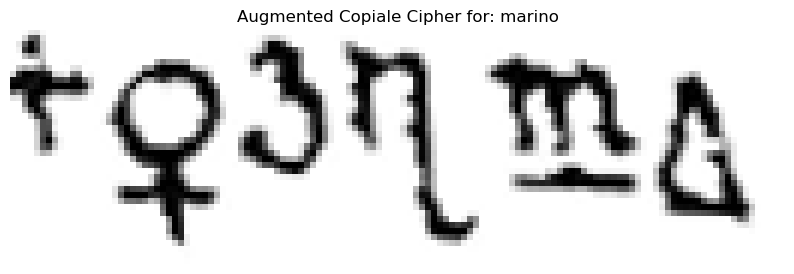

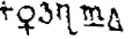

In [30]:
display_augmented_name("marino", show_transcription=True)